In [3]:
# dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from collections import Counter

# Load your dataset 
nba_df = pd.read_csv('../Resources/nba.csv')

In [2]:
# View datafram
nba_df

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G,Champ
0,1.0,Orlando Magic*,27.9,59.0,23.0,61,21,7.49,-0.37,7.12,...,NaN,0.477,12.2,77.4,0.205,NaN,Amway Arena,715901.0,17461.0,0
1,2.0,Cleveland Cavaliers*,28.0,61.0,21.0,59,23,6.52,-0.36,6.17,...,NaN,0.482,12.3,77.2,0.218,NaN,Quicken Loans Arena,843042.0,20562.0,0
2,3.0,Utah Jazz*,25.6,53.0,29.0,55,27,5.34,-0.01,5.33,...,NaN,0.492,14.2,75.6,0.269,NaN,EnergySolutions Arena,794512.0,19378.0,0
3,4.0,San Antonio Spurs*,28.7,50.0,32.0,55,27,5.09,-0.02,5.07,...,NaN,0.483,12.1,76.3,0.214,NaN,AT&T Center,741676.0,18090.0,0
4,5.0,Atlanta Hawks*,26.5,53.0,29.0,54,28,4.66,-0.22,4.44,...,NaN,0.496,13.2,72.7,0.208,NaN,Philips Arena,678375.0,16546.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,26.0,Memphis Grizzlies,24.4,27.0,55.0,24,58,-7.00,0.43,-6.57,...,NaN,0.551,13.5,74.8,0.195,NaN,FedEx Forum,681875.0,16631.0,0
446,27.0,Detroit Pistons,23.8,14.0,68.0,20,62,-9.11,0.05,-9.06,...,NaN,0.558,11.1,77.3,0.221,NaN,Little Caesars Arena,726378.0,18159.0,0
447,28.0,Washington Wizards,24.9,15.0,67.0,20,62,-9.29,0.00,-9.29,...,NaN,0.562,12.0,72.5,0.201,NaN,Capital One Arena,692851.0,16899.0,0
448,29.0,Portland Trail Blazers,24.1,21.0,61.0,20,62,-9.02,0.74,-8.29,...,NaN,0.558,12.8,74.0,0.216,NaN,Moda Center,751395.0,18327.0,0


In [3]:
# clean dataframe
cleaned_nba_df = nba_df.drop(['Team','Rk','Age','Arena','Unnamed: 17','Unnamed: 22','Unnamed: 27'], axis = 1)

In [4]:
# view columns
cleaned_nba_df.columns

Index(['W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg',
       'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA',
       'eFG%.1', 'TOV%.1', 'DRB%', 'FT/FGA.1', 'Attend.', 'Attend./G',
       'Champ'],
      dtype='object')

In [5]:
# Inspect the dataset
print(cleaned_nba_df)
print(cleaned_nba_df.info())
print(cleaned_nba_df.describe())

# Check for missing values
print(cleaned_nba_df.isnull().sum())

# Fill or drop missing values
#nba_df.fillna(nba_df.mean(), inplace=True)

# Encode categorical variables if any
cleaned_nba_df = pd.get_dummies(cleaned_nba_df, drop_first=True)

# Split into features and target
X = cleaned_nba_df.drop(columns=['Champ'])  # Replace 'winner' with your target column
y = cleaned_nba_df['Champ']


        W     L  PW  PL    MOV   SOS    SRS   ORtg   DRtg  NRtg  ...  TOV%  \
0    59.0  23.0  61  21   7.49 -0.37   7.12  111.4  103.3   8.1  ...  13.6   
1    61.0  21.0  59  23   6.52 -0.36   6.17  111.2  104.1   7.1  ...  13.4   
2    53.0  29.0  55  27   5.34 -0.01   5.33  110.7  105.0   5.7  ...  14.2   
3    50.0  32.0  55  27   5.09 -0.02   5.07  110.0  104.5   5.5  ...  12.9   
4    53.0  29.0  54  28   4.66 -0.22   4.44  111.9  106.7   5.2  ...  11.4   
..    ...   ...  ..  ..    ...   ...    ...    ...    ...   ...  ...   ...   
445  27.0  55.0  24  58  -7.00  0.43  -6.57  107.2  114.3  -7.1  ...  13.4   
446  14.0  68.0  20  62  -9.11  0.05  -9.06  109.7  118.8  -9.1  ...  13.5   
447  15.0  67.0  20  62  -9.29  0.00  -9.29  110.5  119.6  -9.1  ...  12.2   
448  21.0  61.0  20  62  -9.02  0.74  -8.29  108.3  117.5  -9.2  ...  13.4   
449  21.0  61.0  18  64 -10.24  0.13 -10.12  109.3  119.8 -10.5  ...  12.6   

     ORB%  FT/FGA  eFG%.1  TOV%.1  DRB%  FT/FGA.1   Attend.  At

In [6]:
# check null values if any
print(X.isnull().sum())

W            0
L            0
PW           0
PL           0
MOV          0
SOS          0
SRS          0
ORtg         0
DRtg         0
NRtg         0
Pace         0
FTr          0
3PAr         0
TS%          0
eFG%         0
TOV%         0
ORB%         0
FT/FGA       0
eFG%.1       0
TOV%.1       0
DRB%         0
FT/FGA.1     0
Attend.      0
Attend./G    0
dtype: int64


In [7]:
print(X.shape)  # Check if X has 0 samples or the expected number
print(y.shape)  # Check if y has 150 samples

(450, 24)
(450,)


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
print(f"Number of samples in training data: {X.shape[0]}")
print(f"Number of samples in training data: {y.shape[0]}")

Number of samples in training data: 450
Number of samples in training data: 450


In [10]:
from imblearn.over_sampling import SMOTE
# upsample data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [11]:
print(f"Number of samples in training data: {X_resampled.shape[0]}")
print(f"Number of samples in training data: {y_resampled.shape[0]}")

Number of samples in training data: 648
Number of samples in training data: 648


In [12]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning (optional but recommended)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Use the best model
best_rf = grid_search.best_estimator_

# Train the model
best_rf.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

Accuracy: 0.92
ROC AUC: 0.86
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       111
           1       0.11      0.50      0.18         2

    accuracy                           0.92       113
   macro avg       0.55      0.71      0.57       113
weighted avg       0.97      0.92      0.94       113



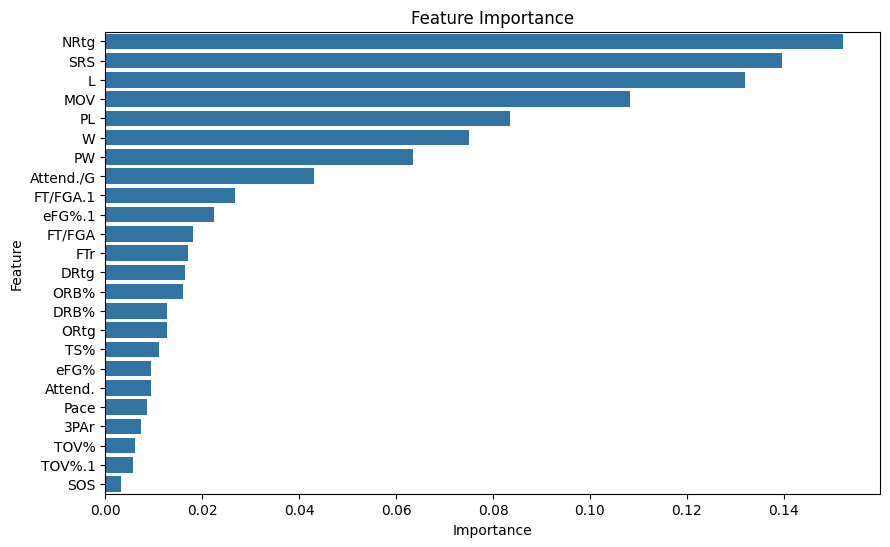

In [13]:
# Make predictions
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.2f}")
print(classification_report(y_test, y_pred))

# Feature importance
importances = best_rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

Test 1 results

Accuracy: 0.91
ROC AUC: 0.85
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       111
           1       0.10      0.50      0.17         2

    accuracy                           0.91       113
   macro avg       0.55      0.71      0.56       113
weighted avg       0.97      0.91      0.94       113

Test 2 results 

Accuracy: 0.91
ROC AUC: 0.67
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       111
           1       0.10      0.50      0.17         2

    accuracy                           0.91       113
   macro avg       0.55      0.71      0.56       113
weighted avg       0.97      0.91      0.94       113

Test 3

Accuracy: 0.91
ROC AUC: 0.87
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       111
           1       0.10      0.50      0.17         2

    accuracy                           0.91       113
   macro avg       0.55      0.71      0.56       113
weighted avg       0.97      0.91      0.94       113